In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
A = np.array([
    [5, 3, 0, 1],
    [4, 0, 0, 1],
    [1, 1, 0, 5],
    [1, 0, 0, 4],
    [0, 1, 5, 4],
])

n,m=A.shape
k=2

np.random.seed(10)
P=np.random.randn(n,k)
Q=np.random.randn(m,k)

b=np.mean(A[np.where(A!=0)])
bi=np.zeros(n)
bj=np.zeros(m)
iterr=20
alpha=0.01
beta=0.02

In [27]:
P[0,:]

array([1.3315865 , 0.71527897])

In [3]:
train=[(i,j,A[i,j]) for i in range(n) for j in range(m) if A[i,j]!=0]

In [28]:
def get_rating_(x):
    i=x[0]
    j=x[1]
    return b + np.dot(P[i,:]+bi[i],(Q[j,:]+bj[j]).T)

In [30]:
df=pd.DataFrame(train,columns=['user','item','rating'])
df['predict']=df[['user','item']].apply(get_rating_,axis=1)
df

,user,item,rating,predict
0,0,0,5,4.206350
1,0,1,3,2.219665
2,0,3,1,1.352407
3,1,0,4,2.089946
4,1,3,1,4.524603
5,2,0,1,2.171996
6,2,1,1,1.429155
7,2,3,5,1.965709
8,3,0,1,3.014792
9,3,3,4,2.482119


In [42]:
def  backprop(x, P=P, Q=Q, b=b, bi=bi, bj=bj,alpha=alpha, beta=beta):
    i=x[0]
    j=x[1]
    a=x[2]
    a_hat=b + np.dot( P[i,:]+bi[i] ,(Q[j,:]+bj[j]).T)
    e=(a_hat-a)
    
    dp=e*(Q[j,:]+bj[j])
    P[i,:]=P[i,:]-alpha*dp
    
    dq=e*(P[i,:]+bi[i])
    Q[j,:]=Q[j,:]-alpha*dq
    
    db=e
    b=b-beta*e
    
    dbi=dp
    bi[i]=bi[i]-beta*np.mean(dbi)
    
    dbj=dq
    bj[j]=bj[j]-beta*np.mean(dbj)
    
    a_hat=b + np.dot( P[i,:]+bi[i] ,(Q[j,:]+bj[j]).T)
    err=(a-a_hat)**2
    
    return P,Q,b,bi,bj,err

In [45]:
def model(df, iterr=20, P=P, Q=Q, b=b, bi=bi, bj=bj,alpha=alpha, beta=beta):
    total_scores=[]
    for _ in range(iterr):
        batch_scores=[]
        for x in df.index:
            P,Q,b,bi,bj,err=backprop(df[['user','item','rating']].loc[x,:])
            batch_scores.append(err)
        total_scores.append(np.mean(batch_scores))
    
    plt.plot(total_scores)
    result={'P':P, 'Q':Q, 'b':b, 'bi':bi, 'bj':bj}
    return total_scores, result

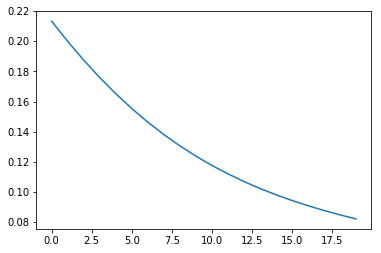

In [46]:
scores, result=model(df)

In [55]:
def factorization(result):
    n=result['P'].shape[0]
    m=result['Q'].shape[0]
    return result['b'] + np.dot(result['P']+result['bi'].reshape(n,1), (result['Q']+result['bj'].reshape(m,1)).T)

In [56]:
A_hat=factorization(result)

In [57]:
A

array([[5, 3, 0, 1],
       [4, 0, 0, 1],
       [1, 1, 0, 5],
       [1, 0, 0, 4],
       [0, 1, 5, 4]])

In [59]:
np.round(A_hat,2)

array([[4.75, 3.05, 0.86, 0.86],
       [4.34, 4.62, 1.4 , 1.41],
       [0.69, 0.93, 4.58, 4.57],
       [1.22, 1.83, 4.15, 4.15],
       [0.81, 1.08, 4.48, 4.47]])

In [60]:
scores[-1]

0.08219390383599719